In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import output_processing as op
import random
random.seed(42)

/Users/ab-purushothama-macbook/.conda/envs/prej-prompt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load data from all models

In [2]:
model_list = [
    # Main set of models with instruct divide and size variety
    "meta-llama/Llama-3.2-1B",
    "meta-llama/Llama-3.2-1B-Instruct",
    "meta-llama/Llama-3.2-3B",
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.1-8B",
    "meta-llama/Llama-3.1-8B-Instruct",
    # Small reference model - would allow for pretraining variation
    "gpt2-medium",
    # Other open models
    "allenai/OLMo-2-1124-7B",
    "allenai/OLMo-2-1124-7B-Instruct",
    "mistralai/Ministral-8B-Instruct-2410",
    "google/gemma-7b",
    "google/gemma-7b-it"
]

def read_and_organize_model_results(model_name):
    model_results = pd.read_csv(f"runs/runs-42_07_18/{model_name}-results.csv")
    model_results.replace([0.0], -65504, inplace=True)
    model_results = op.organize_distribution(model_results)
    model_results["model_name"] = model_name.split("/")[-1]
    print(model_name, model_results.output.value_counts())
    return model_results
    
combined_results = [read_and_organize_model_results(model_name) for model_name in model_list]
combined_df = pd.concat(combined_results).reset_index()
combined_df.loc[:, "item"] = combined_df["title"] + combined_df["version"]
combined_df.shape

meta-llama/Llama-3.2-1B output
yes       565
"         255
B         164
A         112
Yes        85
it         48
Harper      7
No          6
Name: count, dtype: int64
meta-llama/Llama-3.2-1B-Instruct output
yes    768
B      267
No     161
        17
\n      11
Yes      9
A        9
Name: count, dtype: int64
meta-llama/Llama-3.2-3B output
yes    846
B      260
no     112
A       14
No       7
C        2
\n       1
Name: count, dtype: int64
meta-llama/Llama-3.2-3B-Instruct output
yes    820
B      259
No      92
no      48
A       17
\n       6
Name: count, dtype: int64
meta-llama/Llama-3.1-8B output
yes    789
B      184
no     177
A       92
Name: count, dtype: int64
meta-llama/Llama-3.1-8B-Instruct output
no     617
yes    272
B      226
No      67
A       50
Yes     10
Name: count, dtype: int64
gpt2-medium output
yes      580
no       253
A        201
"        133
B         71
Genie      3
No         1
Name: count, dtype: int64
allenai/OLMo-2-1124-7B output
yes        556
no      

(14904, 26)

In [3]:
combined_df

,index,title,prompt_type,prompt,version,output,output_text,cum_logprob,YES_probs,Yes_probs,...,Other_prob,Aff_prob,UnAff_prob,Covered_prob,NotCovered_prob,Covered,NotCovered,entropy,model_name,item
0,0,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",unambiguous_uncovered,it,it depends.\nThe insurance company's definiti...,NaN,-5.554084,0.095245,...,0.836639,0.095245,0.068116,0.095245,0.068116,True,False,0.556171,Llama-3.2-1B,Emergency Damages Iunambiguous_uncovered
1,1,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",unambiguous_covered,it,it depends.\nThe insurance company argues tha...,NaN,-5.560510,0.096750,...,0.836042,0.096750,0.067207,0.096750,0.067207,True,False,0.557145,Llama-3.2-1B,Emergency Damages Iunambiguous_covered
2,2,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",controversial,it,it depends.\nThe insurance company's definiti...,NaN,-5.304534,0.112464,...,0.817047,0.112464,0.070489,0.112464,0.070489,True,False,0.597797,Llama-3.2-1B,Emergency Damages Icontroversial
3,3,Emergency Damages II,yes_or_no,"Salma's home insurance covers ""Emergency Damag...",unambiguous_uncovered,it,it depends.\nThe first thing to note is that ...,NaN,-4.786050,0.141056,...,0.775327,0.141056,0.083616,0.141056,0.083616,True,False,0.681065,Llama-3.2-1B,Emergency Damages IIunambiguous_uncovered
4,4,Emergency Damages II,yes_or_no,"Salma's home insurance covers ""Emergency Damag...",unambiguous_covered,it,it depends.\nThe first thing to note is that ...,NaN,-4.936429,0.120958,...,0.792252,0.120958,0.086790,0.120958,0.086790,True,False,0.652136,Llama-3.2-1B,Emergency Damages IIunambiguous_covered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14899,1237,Vehicle Glass I,options_flipped,Ahmad's car insurance policy includes coverage...,unambiguous_covered,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe t...,NaN,-12.750042,0.000159,...,0.999839,0.367862,0.049785,0.367862,0.049785,True,False,0.713895,gemma-7b-it,Vehicle Glass Iunambiguous_covered
14900,1238,Vehicle Glass I,options_flipped,Ahmad's car insurance policy includes coverage...,controversial,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe t...,NaN,-12.541211,0.000153,...,0.999844,0.101144,0.037209,0.101144,0.037209,True,False,0.440780,gemma-7b-it,Vehicle Glass Icontroversial
14901,1239,Vehicle Glass II,options_flipped,Aneesh's car insurance policy includes coverag...,unambiguous_uncovered,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe p...,NaN,-12.605734,0.000236,...,0.999762,0.257580,0.034860,0.257580,0.034860,True,False,0.617459,gemma-7b-it,Vehicle Glass IIunambiguous_uncovered
14902,1240,Vehicle Glass II,options_flipped,Aneesh's car insurance policy includes coverag...,unambiguous_covered,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe p...,NaN,-12.389812,0.000179,...,0.999820,0.412730,0.043501,0.412730,0.043501,True,False,0.720363,gemma-7b-it,Vehicle Glass IIunambiguous_covered


# Distribution of Agreements

In [173]:
majority_vote_by_model = combined_df.groupby(['title', 'version', 'model_name'], as_index=False, sort=False).aggregate(
     {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)
majority_vote_by_model.loc[:, "majority_count"] = majority_vote_by_model[['Covered', 'NotCovered']].max(axis=1)
majority_vote_by_model.shape
table_df = majority_vote_by_model[["model_name", "majority_count"]].value_counts().reset_index(name="Frequency")\
.pivot(columns =['majority_count'], index="model_name")\

table_df.replace(np.nan, 0, inplace=True)
# sns.heatmap(table_df)
table_df

Frequency                       
majority_count                     5     6     7     8    9
model_name                                                 
Llama-3.1-8B                    40.0  50.0  48.0   0.0  0.0
Llama-3.1-8B-Instruct            8.0  41.0  56.0  29.0  4.0
Llama-3.2-1B                    10.0  59.0  69.0   0.0  0.0
Llama-3.2-1B-Instruct          129.0   9.0   0.0   0.0  0.0
Llama-3.2-3B                    79.0  55.0   4.0   0.0  0.0
Llama-3.2-3B-Instruct           77.0  46.0  15.0   0.0  0.0
Ministral-8B-Instruct-2410      20.0  67.0  26.0  24.0  1.0
OLMo-2-1124-7B                  47.0  64.0  20.0   7.0  0.0
OLMo-2-1124-7B-Instruct         51.0  57.0  30.0   0.0  0.0
gemma-7b                        44.0  60.0  29.0   5.0  0.0
gemma-7b-it                     10.0  33.0  79.0  16.0  0.0
gpt2-medium                     50.0  83.0   5.0   0.0  0.0

In [174]:
majority_vote_by_model[majority_vote_by_model.majority_count == 9]

,title,version,model_name,Covered,NotCovered,majority_count
816,Vehicle Theft V,unambiguous_uncovered,Llama-3.1-8B-Instruct,0,9,9
817,Vehicle Theft V,unambiguous_covered,Llama-3.1-8B-Instruct,0,9,9
818,Vehicle Theft V,controversial,Llama-3.1-8B-Instruct,0,9,9
821,Vehicle Theft VI,controversial,Llama-3.1-8B-Instruct,0,9,9
1321,Wind Damage,unambiguous_covered,Ministral-8B-Instruct-2410,9,0,9


In [177]:
majority_vote_by_model.majority_count.value_counts()

majority_count
6    624
5    565
7    381
8     81
9      5
Name: count, dtype: int64

In [175]:
table_df.to_latex("reports/majority-votes-freq-table.tex", float_format="%.0f")

In [165]:
smaller_prompt_type_mask = (combined_df["prompt_type"].isin(["yes_or_no", "no_or_yes", "agreement", "options", "options_flipped"]))
majority_vote_by_model = combined_df[smaller_prompt_type_mask].groupby(['title', 'version', 'model_name'], as_index=False, sort=False).aggregate(
     {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)
majority_vote_by_model.loc[:, "majority_count"] = majority_vote_by_model[['Covered', 'NotCovered']].max(axis=1)
majority_vote_by_model.shape
table_df = majority_vote_by_model[["model_name", "majority_count"]].value_counts().reset_index(name="Frequency")\
.pivot(columns =['majority_count'], index="model_name")\

table_df.replace(np.nan, 0, inplace=True)
# sns.heatmap(table_df)
table_df

Frequency             
majority_count                     3     4      5
model_name                                       
Llama-3.1-8B                    34.0  56.0   48.0
Llama-3.1-8B-Instruct            7.0  83.0   48.0
Llama-3.2-1B                    10.0  59.0   69.0
Llama-3.2-1B-Instruct          129.0   9.0    0.0
Llama-3.2-3B                   100.0  34.0    4.0
Llama-3.2-3B-Instruct           72.0  57.0    9.0
Ministral-8B-Instruct-2410      18.0  72.0   48.0
OLMo-2-1124-7B                  71.0  51.0   16.0
OLMo-2-1124-7B-Instruct         51.0  38.0   49.0
gemma-7b                        53.0  59.0   26.0
gemma-7b-it                     13.0  25.0  100.0
gpt2-medium                    126.0  12.0    0.0

,title,version,model_name,Covered,NotCovered,majority_count


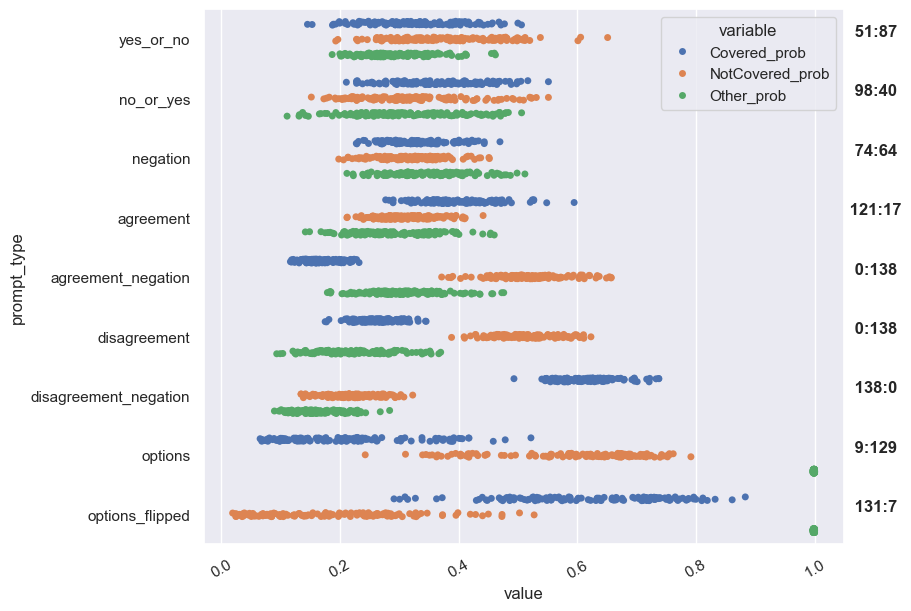

In [131]:
# Melt yes_or_no for the three supported variables
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")
model_mask = combined_df["model_name"] == "Llama-3.2-3B-Instruct"
model_results_df = combined_df[model_mask]
count_labels = model_results_df.groupby('prompt_type', as_index=False, sort=False).aggregate(
    {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)
count_labels


p = sns.stripplot(x='value', y='prompt_type',  hue='variable', jitter=True, dodge=True, data=model_results_df.melt(id_vars = ["prompt_type"], value_vars=["Covered_prob", "NotCovered_prob", "Other_prob"]))
for i, counts in enumerate(zip(count_labels.Covered.values, count_labels.NotCovered.values)): 
    covered = counts[0]
    not_covered = counts[1]
    ax.text(ax.get_xlim()[1] + 0.05, i, f' {covered}:{not_covered}', 
        ha='center', va='bottom', fontweight='bold')

In [8]:
divergences = op.calculate_relative_measures(combined_df)
divergences.shape

(13248, 6)

In [ ]:
divergences.js_dist.value_counts()

<Axes: xlabel='None-prompt_type', ylabel='model_name'>

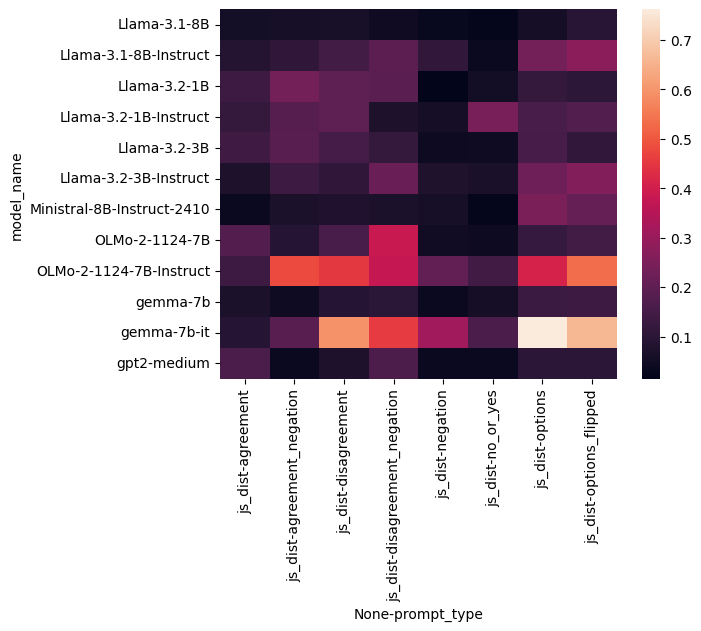

In [9]:
sns.heatmap( data=divergences.groupby(['prompt_type', 'model_name'], as_index=False, sort=False).aggregate({"js_dist": 'mean'})\
.pivot_table(index = ["model_name"], columns=["prompt_type"], values=["js_dist"]))

<Axes: xlabel='None-prompt_type', ylabel='model_name'>

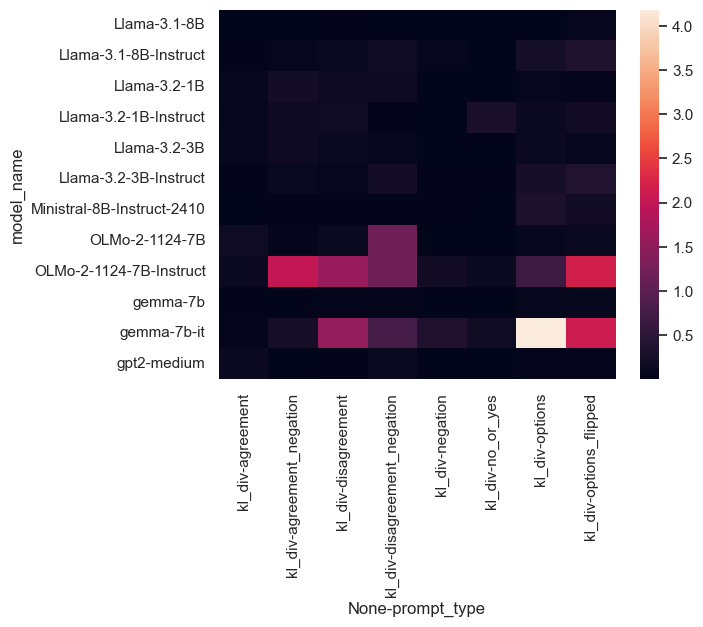

In [26]:
sns.heatmap(data=divergences.groupby(['prompt_type', 'model_name'], as_index=False, sort=False).aggregate({"kl_div": 'mean'})\
.pivot_table(index = ["model_name"], columns=["prompt_type"], values=["kl_div"]))

<Axes: xlabel='prompt_type', ylabel='js_dist'>

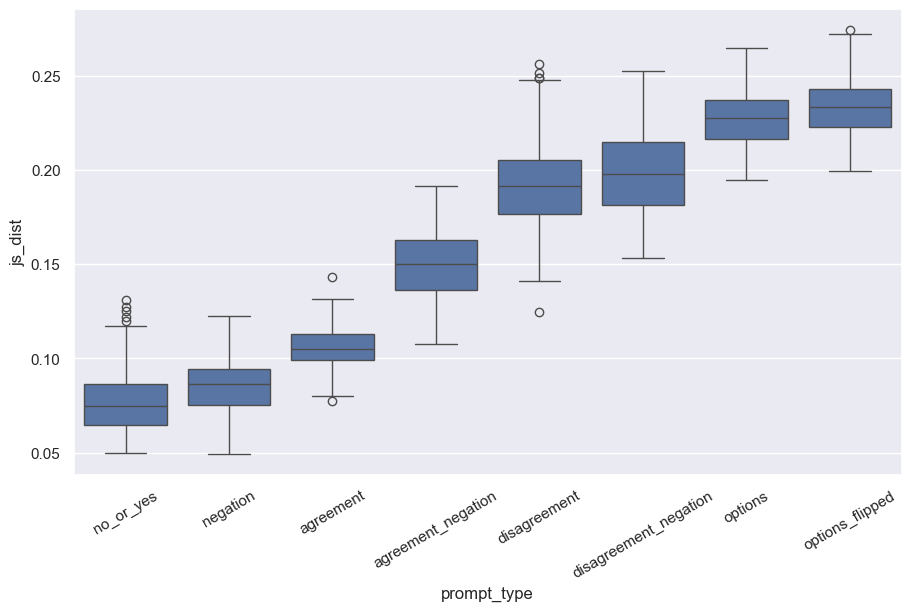

In [44]:
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")
sns.boxplot(data=divergences.groupby(['title', 'version', 'prompt_type'], as_index=False, sort=False).aggregate({"js_dist": "mean"}), 
           x='prompt_type', y = "js_dist",)

In [83]:
combined_df.sample()

,index,title,prompt_type,prompt,version,output,output_text,cum_logprob,YES_probs,Yes_probs,...,UnAff_prob,Covered_prob,NotCovered_prob,Covered,NotCovered,entropy,model_name,item,judgment,in_minority
7070,860,Garden Plants I,disagreement_negation,"Genie has home insurance that covers ""Garden P...",controversial,yes,yes. (Note: This is a question about the mean...,NaN,-3.687111,0.429962,...,0.438326,0.429962,0.438326,False,True,0.991439,Llama-3.1-8B-Instruct,Garden Plants Icontroversial,Not Covered,False


## Distribution of minority judgments across prompt types

In [86]:
# Distribution of minority judgments across prompt types
majority_vote_by_model = combined_df.groupby(['title', 'version', 'model_name'], as_index=False, sort=False).aggregate(
     {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)
majority_vote_by_model.loc[:, "majority"] = majority_vote_by_model.apply(lambda x: "Covered" if x.Covered >= x.NotCovered else "Not Covered",  axis=1)
# table_df = majority_vote_bye_model[["model_name", "majority_count"]].value_counts().reset_index(name="Frequency")\
# .pivot(columns =['majority_count'], index="model_name")
combined_df.loc[combined_df.Covered == True, "judgment"] = "Covered"
combined_df.loc[combined_df.NotCovered == True, "judgment"] = "Not Covered"
# table_df.replace(np.nan, 0, inplace=True)
# # sns.heatmap(table_df)
# table_df
combined_df.loc[:, "in_minority"]= False
for index, row in majority_vote_by_model.iterrows():
    item_model_mask = (combined_df["title"] == row.title) & (combined_df["version"] == row.version) & (combined_df["model_name"] == row.model_name)
    in_minority_mask = combined_df["judgment"]!= row.majority
    combined_df.loc[item_model_mask & in_minority_mask, "in_minority"] = True

combined_df.in_minority.sum()

np.int64(4975)

In [155]:
combined_df.to_csv("reports/combined_07_18.csv", index=False)

In [148]:
minority_responses = combined_df[combined_df.in_minority == True]
minority_responses[["model_name", "prompt_type"]].value_counts().reset_index()

,model_name,prompt_type,count
0,Llama-3.2-3B,agreement_negation,138
1,Llama-3.2-1B,disagreement,138
2,Llama-3.2-1B,agreement_negation,138
3,Llama-3.2-3B,options,128
4,gemma-7b-it,disagreement,127
...,...,...,...
94,gpt2-medium,no_or_yes,4
95,gemma-7b-it,yes_or_no,2
96,Llama-3.1-8B-Instruct,options,1
97,Llama-3.1-8B-Instruct,yes_or_no,1


In [137]:
minority_responses[["model_name"]].value_counts().reset_index()

,model_name,count
0,Llama-3.2-1B-Instruct,543
1,Llama-3.2-3B,489
2,Llama-3.2-3B-Instruct,476
3,gpt2-medium,459
4,OLMo-2-1124-7B-Instruct,435
5,OLMo-2-1124-7B,427
6,gemma-7b,419
7,Llama-3.1-8B,406
8,Ministral-8B-Instruct-2410,357
9,Llama-3.2-1B,355


In [138]:
minority_responses[["prompt_type"]].value_counts().reset_index()

,prompt_type,count
0,disagreement,1098
1,agreement_negation,864
2,options,704
3,disagreement_negation,663
4,agreement,454
5,options_flipped,447
6,negation,330
7,no_or_yes,252
8,yes_or_no,163


In [168]:
minority_responses[minority_responses.prompt_type == "disagreement"].model_name.value

995.0

In [136]:
minority_responses[["model_name", "prompt_type"]].value_counts().reset_index().pivot(index="model_name", columns=['prompt_type'])

count                                  \
prompt_type                agreement agreement_negation disagreement   
model_name                                                             
Llama-3.1-8B                    21.0              101.0        110.0   
Llama-3.1-8B-Instruct            5.0               33.0         58.0   
Llama-3.2-1B                     NaN              138.0        138.0   
Llama-3.2-1B-Instruct           12.0              126.0        126.0   
Llama-3.2-3B                   106.0              138.0        108.0   
Llama-3.2-3B-Instruct           51.0               70.0         70.0   
Ministral-8B-Instruct-2410       8.0               52.0         80.0   
OLMo-2-1124-7B                  62.0               57.0         67.0   
OLMo-2-1124-7B-Instruct         34.0               68.0        106.0   
gemma-7b                        22.0               63.0         95.0   
gemma-7b-it                      8.0                5.0        127.0   
gpt2-medium                    125.0               13.0         13.0   

                                                                             \
prompt_type                disagreement_negation negation no_or_yes options   
model_name                                                                    
Llama-3.1-8B                                36.0     31.0      15.0    30.0   
Llama-3.1-8B-Instruct                       75.0     33.0       1.0     1.0   
Llama-3.2-1B                                 NaN      NaN      14.0    48.0   
Llama-3.2-1B-Instruct                       12.0      NaN     126.0   117.0   
Llama-3.2-3B                                 NaN      NaN       NaN   128.0   
Llama-3.2-3B-Instruct                       68.0     40.0      32.0    61.0   
Ministral-8B-Instruct-2410                  59.0     51.0       5.0    80.0   
OLMo-2-1124-7B                              67.0     29.0      27.0    46.0   
OLMo-2-1124-7B-Instruct                     70.0     48.0       9.0    26.0   
gemma-7b                                    47.0     30.0      14.0    71.0   
gemma-7b-it                                104.0     26.0       5.0     5.0   
gpt2-medium                                125.0     42.0       4.0    91.0   

                                                      
prompt_type                options_flipped yes_or_no  
model_name                                            
Llama-3.1-8B                          31.0      31.0  
Llama-3.1-8B-Instruct                 89.0       1.0  
Llama-3.2-1B                          17.0       NaN  
Llama-3.2-1B-Instruct                 12.0      12.0  
Llama-3.2-3B                           NaN       9.0  
Llama-3.2-3B-Instruct                 61.0      23.0  
Ministral-8B-Instruct-2410            17.0       5.0  
OLMo-2-1124-7B                        60.0      12.0  
OLMo-2-1124-7B-Instruct               57.0      17.0  
gemma-7b                              34.0      43.0  
gemma-7b-it                           31.0       2.0  
gpt2-medium                           38.0       8.0

In [154]:
for group, data in minority_responses[["model_name", "prompt_type"]].value_counts().reset_index().groupby('model_name', as_index=False, sort=False):
    print(group, data.loc[data["count"].idxmax(), "prompt_type"])

Llama-3.2-3B agreement_negation
Llama-3.2-1B disagreement
gemma-7b-it disagreement
Llama-3.2-1B-Instruct no_or_yes
gpt2-medium agreement
Llama-3.1-8B disagreement
OLMo-2-1124-7B-Instruct disagreement
gemma-7b disagreement
Llama-3.1-8B-Instruct options_flipped
Ministral-8B-Instruct-2410 disagreement
Llama-3.2-3B-Instruct agreement_negation
OLMo-2-1124-7B disagreement


## Always, and Random Reference models

In [11]:
# Absolute and Consistent
def absolute_covered(size):
    results = np.zeros((size, 3))
    results[:, 0] = 1 
    return results

# Absolute and Consistent
def absolute_not_covered(size):
    results = np.zeros((size, 3))
    results[:, 1] = 1.0 
    return results


# Absolute and Random
def random_absolute(size):
    results = np.zeros((size, 3))
    for i in range(size):
        results[i, random.choice(range(2))] = 1.0
    return results

def absolute_and_identical(distribution):
    results = np.zeros((size, 3))
    results[:, np.argmax(distribution)] = 1.0
    return results

In [12]:
prompt_type_mask = combined_df["prompt_type"] == "yes_or_no"
yes_or_no_df = combined_df[prompt_type_mask]
model_mask = combined_df["model_name"] == "Llama-3.2-3B-Instruct"
combined_df[prompt_type_mask & model_mask][["Covered_prob", "NotCovered_prob", "Other_prob"]]

,Covered_prob,NotCovered_prob,Other_prob
3726,0.334311,0.359766,0.305923
3727,0.410840,0.314359,0.274801
3728,0.334087,0.367839,0.298074
3729,0.353218,0.308596,0.338187
3730,0.390499,0.298764,0.310737
...,...,...,...
3859,0.278162,0.261545,0.460294
3860,0.259900,0.284699,0.455401
3861,0.299424,0.312157,0.388419
3862,0.330779,0.320330,0.348891


In [13]:
abs_cov_distances = np.array([op.sp.spatial.distance.jensenshannon(x, y) for x, y in zip(absolute_covered(138), combined_df[prompt_type_mask & model_mask][["Covered_prob", "NotCovered_prob", "Other_prob"]].values)])
abs_not_cov_distances = np.array([op.sp.spatial.distance.jensenshannon(x, y) for x, y in zip(absolute_not_covered(138), combined_df[prompt_type_mask & model_mask][["Covered_prob", "NotCovered_prob", "Other_prob"]].values)])
random_ref_distances = np.array([op.sp.spatial.distance.jensenshannon(x, y) for x, y in zip(absolute_covered(138), random_absolute(138))])

In [14]:
abs_cov_distances.mean(), abs_cov_distances.std(), random_ref_distances.mean()

(np.float64(0.5710956316822052),
 np.float64(0.0457878246610623),
 np.float64(0.3680132701494171))

In [15]:
abs_not_cov_distances.mean(), abs_not_cov_distances.std(), random_ref_distances.mean()

(np.float64(0.5374133891355368),
 np.float64(0.052589988139339024),
 np.float64(0.3680132701494171))

## Visualize the item wise distances by prompt type for the model w.r.t to reference and random as a reference

(138, 3) (138, 3)
(138, 3) (138, 3)
(138, 3) (138, 3)
(138, 3) (138, 3)
(138, 3) (138, 3)
(138, 3) (138, 3)
(138, 3) (138, 3)
(138, 3) (138, 3)
(138, 3) (138, 3)


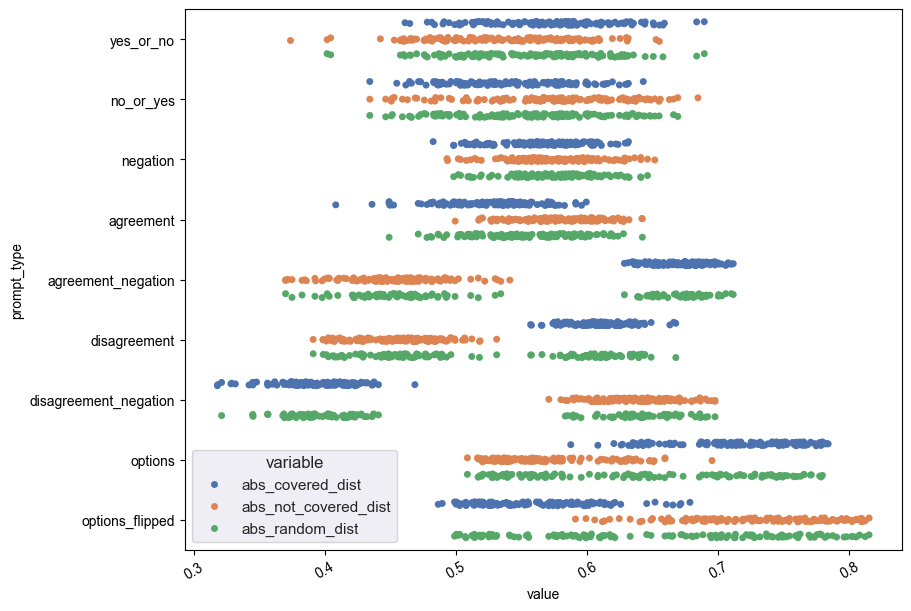

In [16]:
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")

model_mask = combined_df["model_name"] == "Llama-3.2-3B-Instruct"
model_results = combined_df[model_mask]
for x, data in model_results.groupby(['prompt_type'], as_index=False, sort=False):
    print(absolute_covered(138).shape, data[["Covered_prob", "NotCovered_prob", "Other_prob"]].shape)
    model_results.loc[data.index, ["abs_covered_dist"]] = np.array([op.sp.spatial.distance.jensenshannon(x, y) for x, y in zip(absolute_covered(138), data[["Covered_prob", "NotCovered_prob", "Other_prob"]].values)])
    model_results.loc[data.index, ["abs_not_covered_dist"]] = np.array([op.sp.spatial.distance.jensenshannon(x, y) for x, y in zip(absolute_not_covered(138), data[["Covered_prob", "NotCovered_prob", "Other_prob"]].values)])
    model_results.loc[data.index, ["abs_random_dist"]] = np.array([op.sp.spatial.distance.jensenshannon(x, y) for x, y in zip(random_absolute(138), data[["Covered_prob", "NotCovered_prob", "Other_prob"]].values)])

p = sns.stripplot(x='value', y='prompt_type',  hue='variable', jitter=True, dodge=True, data=model_results.melt(id_vars = ["prompt_type"], value_vars=["abs_covered_dist", "abs_not_covered_dist", "abs_random_dist"]))


In [17]:
model_results.groupby('prompt_type', as_index=False, sort=False).aggregate({
    "abs_covered_dist": 'mean', #['mean','std', 'min', 'max'],
    "abs_not_covered_dist": 'mean', #['mean','std', 'min', 'max'],
    "abs_not_covered_dist": 'mean', #['mean','std', 'min', 'max'],
    "abs_random_dist": 'mean', #['mean','std', 'min', 'max']
})

,prompt_type,abs_covered_dist,abs_not_covered_dist,abs_random_dist
0,yes_or_no,0.571096,0.537413,0.554139
1,no_or_yes,0.542928,0.573401,0.557343
2,negation,0.565421,0.572309,0.572469
3,agreement,0.526972,0.578438,0.555431
4,agreement_negation,0.670728,0.453442,0.543606
5,disagreement,0.608814,0.456600,0.524439
6,disagreement_negation,0.393464,0.638819,0.514966
7,options,0.715832,0.566967,0.634244
8,options_flipped,0.557889,0.726877,0.648009


<Axes: xlabel='prompt_type', ylabel='value'>

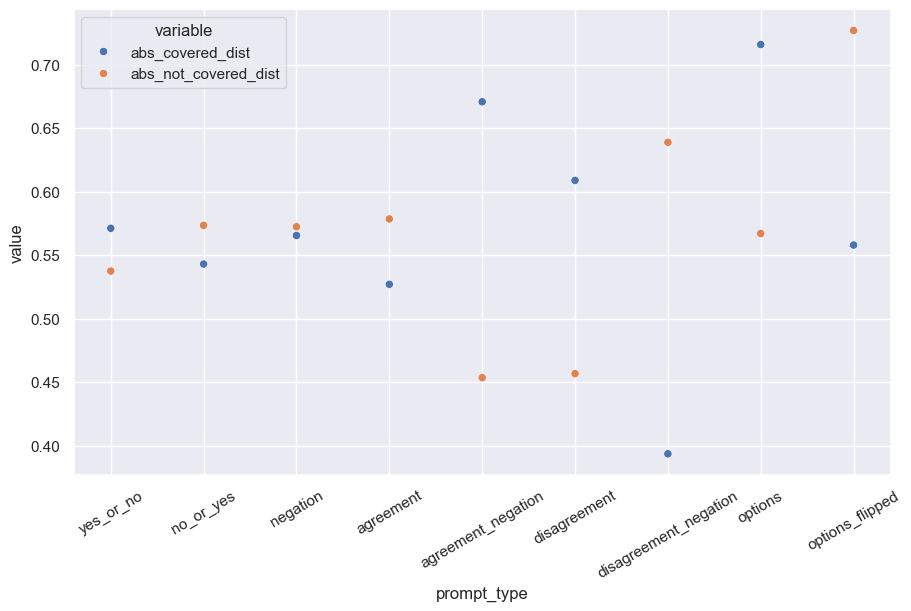

In [18]:
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")
means = model_results.groupby('prompt_type', as_index=False, sort=False).aggregate({
    "abs_covered_dist": 'mean', #['mean','std', 'min', 'max'],
    "abs_not_covered_dist": 'mean', #['mean','std', 'min', 'max'],
    # "abs_random_dist": 'mean', #['mean','std', 'min', 'max']
})
sns.scatterplot(x='prompt_type', y='value', hue= 'variable', data=means.melt(id_vars='prompt_type', value_vars=['abs_covered_dist', 'abs_not_covered_dist']))

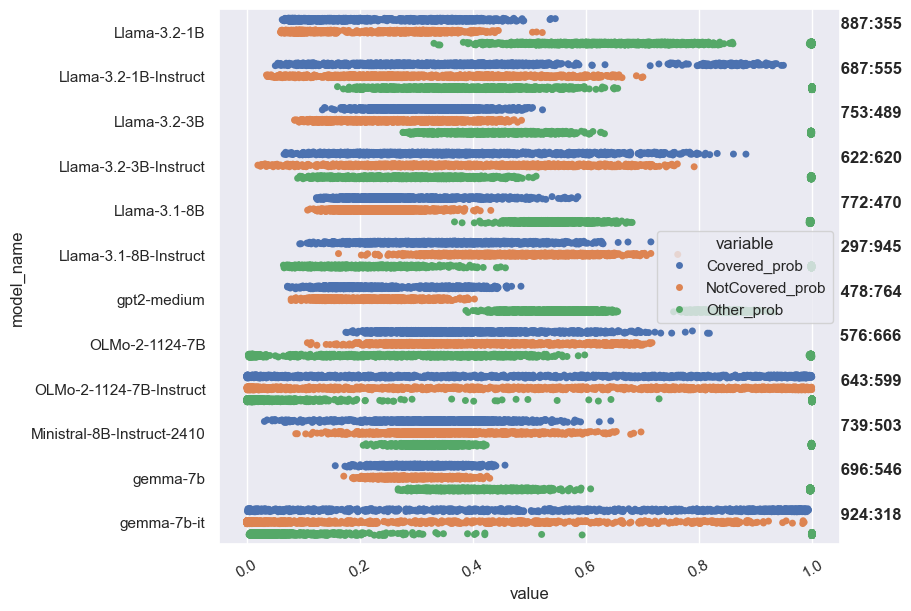

In [19]:
# Melt yes_or_no for the three supported variables
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")

count_labels = combined_df.groupby('model_name', as_index=False, sort=False).aggregate(
    {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)
count_labels


p = sns.stripplot(x='value', y='model_name',  hue='variable', jitter=True, dodge=True, data=combined_df.melt(id_vars = ["model_name"], value_vars=["Covered_prob", "NotCovered_prob", "Other_prob"]))
for i, counts in enumerate(zip(count_labels.Covered.values, count_labels.NotCovered.values)): 
    covered = counts[0]
    not_covered = counts[1]
    ax.text(ax.get_xlim()[1] + 0.05, i, f' {covered}:{not_covered}', 
        ha='center', va='bottom', fontweight='bold')